In [10]:
print("Hello World")

Hello World


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/SEM 6/Artificial Intelligence and Machine Learning/Week4/Copy of Copy of devnagari digit.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# data.data.districts
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# generators -> divide all the data to batches
# each time batch is loaded on RAM and remove after job done and
# process continues until all batches done
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DevanagariHandwrittenDigitDataset/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/DevanagariHandwrittenDigitDataset/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 128,
    image_size = (256, 256)
)



Found 17000 files belonging to 10 classes.
Found 3000 files belonging to 10 classes.


In [6]:
#normalize -> for value (0 to 255) to (0 to 1)
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [7]:
#prediction
import cv2

test_image1_0 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Train/digit_0/103265.png')
test_image2_9 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Test/digit_9/10407.png')
test_image2_2 = cv2.imread('/content/DevanagariHandwrittenDigitDataset/Test/digit_2/12535.png')





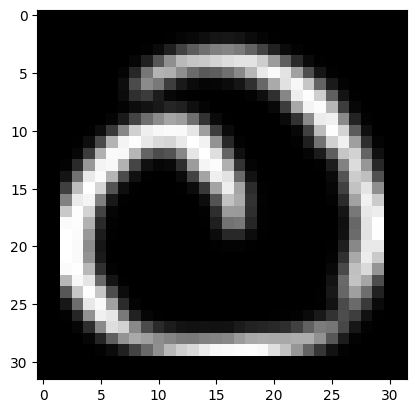

In [8]:
import matplotlib.pyplot as plt
plt.imshow(test_image1_0)

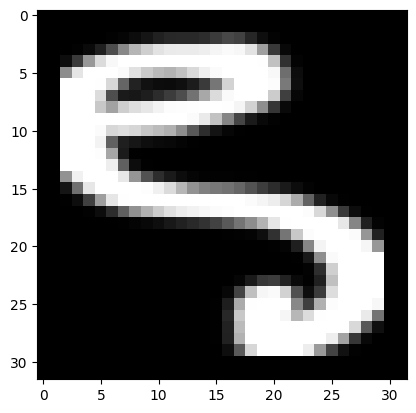

In [9]:
plt.imshow(test_image2_9)

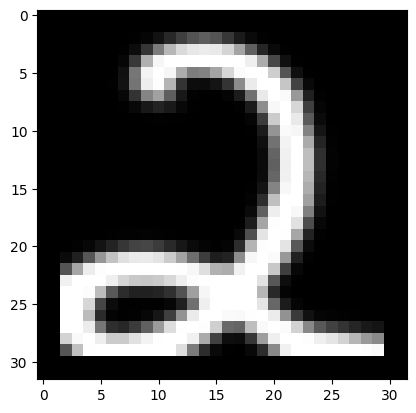

In [11]:
plt.imshow(test_image2_2)

In [12]:
test_image2_9.shape

(32, 32, 3)

In [13]:
#decreasing image size
test_image1 = cv2.resize(test_image2_9,(256,256)) # Resized to (256, 256)
test_image2 = cv2.resize(test_image1_0,(256,256)) # Resized to (256, 256)
test_image3 = cv2.resize(test_image2_2,(256,256)) # Resized to (256, 256)



In [14]:
#reshaping image shape
test_input1 = test_image1.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)
test_input2 = test_image2.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)
test_input3 = test_image3.reshape((1,256,256,3)) # Reshaped to (1, 256, 256, 3)

In [15]:
#using ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [16]:
# Normalize the pixel values to range [0,1]
normalization_layer = keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))


In [17]:

ann_model = Sequential()
ann_model.add(Flatten(input_shape=(256, 256, 3)))
ann_model.add(Dense(64, activation='sigmoid'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(128, activation='sigmoid'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(256, activation='sigmoid'))
ann_model.add(Dropout(0.1))
ann_model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
# Compile the model
ann_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [19]:
# Summary of the model
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      12,582,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,626,890 (48.17 MB)

 Trainable params: 12,626,890 (48.17 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the model using the data generators
history = ann_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=20
)

Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 32s 192ms/step - accuracy: 0.1528 - loss: 2.2812 - val_accuracy: 0.7013 - val_loss: 1.2523
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.6831 - loss: 1.0517 - val_accuracy: 0.8177 - val_loss: 0.4981
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - accuracy: 0.8101 - loss: 0.5501 - val_accuracy: 0.8707 - val_loss: 0.3614
Epoch 4/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.8483 - loss: 0.4291 - val_accuracy: 0.9163 - val_loss: 0.2806
Epoch 5/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.8829 - loss: 0.3509 - val_accuracy: 0.9313 - val_loss: 0.2278
Epoch 6/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 24s 145ms/step - accuracy: 0.9009 - loss: 0.3018 - val_accuracy: 0.9410 - val_loss: 0.1948
Epoch 7/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.9164 - loss: 0.2614 - val_accuracy: 0.9510 - val_loss: 0.1664
Epoch 8/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.9243 - loss: 0

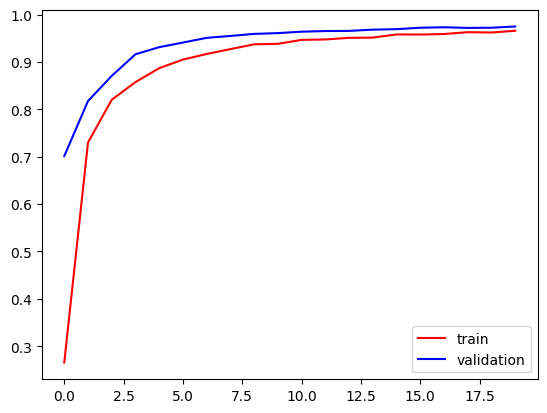

In [21]:
#accuracy graph
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

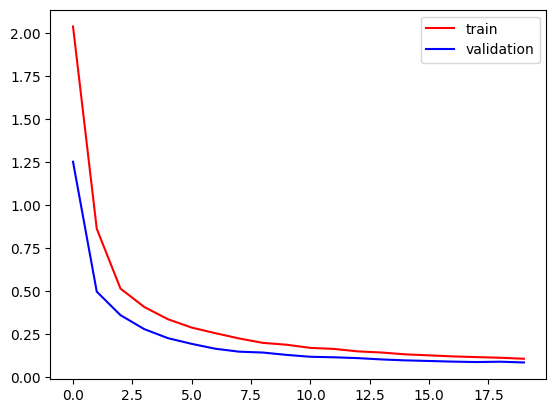

In [22]:
#losss graph
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [23]:
test_input3.shape

(1, 256, 256, 3)

In [29]:

import numpy as np
pred = ann_model.predict(test_input3)
pred_digit = np.argmax(pred)
print(f"predicted output image value is {pred_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted output image value is 3


In [30]:
import numpy as np
# Predict on test data
predictions = ann_model.predict(validation_ds)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


In [31]:
print("Prediction : ",predictions[0])
print("Predicted label : ",predicted_labels[0])
print("Prdection shape", predictions[0].shape)


Prediction :  [3.3963492e-11 4.1050862e-07 7.9409564e-03 9.9162275e-01 8.4001194e-06
 3.9614207e-04 2.8107523e-05 4.4702793e-07 7.9910031e-08 2.6186467e-06]
Predicted label :  3
Prdection shape (10,)


In [32]:
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")


Predicted label for first image: 3


In [33]:
# Get the shape of the first image in the validation dataset
for image, label in validation_ds.take(2):
  print("Image shape:", image.shape)
  print("Label shape:", label.shape)


Image shape: (128, 256, 256, 3)
Label shape: (128,)
Image shape: (128, 256, 256, 3)
Label shape: (128,)


In [34]:
# print(f"True label for first image: {np.argmax(validation_ds[0])}")

In [36]:
ann_model.save("ann_model.h5")

#Loading Saved Model

In [37]:
loaded_model = tf.keras.models.load_model("ann_model.h5")

In [38]:
predict1 = loaded_model.predict(test_input3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


In [39]:
predicted_digit = np.argmax(predict1)
print("Predicted digit:", predicted_digit)

Predicted digit: 3
